In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/michelle/Desktop/UB_course/ML/Assigment-1/datasets/penguins.csv')
df=df.dropna()
del df["year"]
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [82]:
main_statistics=df.describe()
print(main_statistics)

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


In [83]:
df['species'] = pd.Categorical(df['species'])
df['island'] = pd.Categorical(df['island'])
df['sex'] = pd.Categorical(df['sex'])
df['species']=df['species'].cat.codes
df['island']=df['island'].cat.codes
df['sex']=df['sex'].cat.codes
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
339,1,1,55.8,19.8,207.0,4000.0,1
340,1,1,43.5,18.1,202.0,3400.0,0
341,1,1,49.6,18.2,193.0,3775.0,1
342,1,1,50.8,19.0,210.0,4100.0,1


In [84]:
#Normalizenon-categoricalfeatures
df_normal=df
features = df_normal[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
min_value=features.min()
max_value=features.max()
features=(features-min_value)/(max_value-min_value)
df_normal[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = features
df_normal

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,0.254545,0.666667,0.152542,0.291667,1
1,0,2,0.269091,0.511905,0.237288,0.305556,0
2,0,2,0.298182,0.583333,0.389831,0.152778,0
4,0,2,0.167273,0.738095,0.355932,0.208333,0
5,0,2,0.261818,0.892857,0.305085,0.263889,1
...,...,...,...,...,...,...,...
339,1,1,0.861818,0.797619,0.593220,0.361111,1
340,1,1,0.414545,0.595238,0.508475,0.194444,0
341,1,1,0.636364,0.607143,0.355932,0.298611,1
342,1,1,0.680000,0.702381,0.644068,0.388889,1


In [85]:
# select sex as the target value Y

In [86]:
bias=df_normal.shape[0]*[1]
df_normal.insert(loc=0, column='bias', value=bias)
X=df_normal.drop(['sex'], axis=1)
y=df_normal[['sex']] #target value

df = df.sample(frac = 1) #shuffle data
train_size = int(0.8 * len(df_normal))
train_X = X[:train_size]
train_y= y[:train_size]
test_X=X[train_size:]
test_y=y[train_size:]

t_X_shpe=train_X.shape
t_y_shpe=train_y.shape
tes_X_shpe=test_X.shape
tes_y_shpe=test_y.shape
print(t_X_shpe,t_y_shpe,tes_X_shpe,tes_y_shpe)


(266, 7) (266, 1) (67, 7) (67, 1)


In [135]:
class LogitRegression():
    def __init__(self, learning_rate=1e-6, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, X, y):
        n = y.shape[0]
        h = self.sigmoid(X @ self.w.T)
        J = (1 / n) * (-y.iloc[:,0]*np.log(h)-(1-y.iloc[:,0])*np.log(1-h))
        return J
    
    def gradient_descent(self, X, y):
        n = y.shape[0]
        pred = self.sigmoid(X@self.w.T)
        delta = pred - y.iloc[:,0]
        dw = (1 / n) * np.dot(X.T, delta)
        return dw

    def fit(self, X, y):
        # Initialize the weights
        self.w = np.random.uniform(0, 1, X.shape[1])
        # Initialize the loss array
        self.loss = []
        # Run gradient descent for the specified number of iterations
        for i in range(self.num_iterations):
            dw = self.gradient_descent(X, y)
            self.w -= dw
            # Calculate the cost function and append it to the loss array
            J = self.cost(X, y)
            self.loss.append(J)   

    def predict(self, X):
        # Predict the binary labels for the input data
        y_pred = self.sigmoid(X @ self.w)
        return np.where(y_pred >= 0.5, 1, 0)

In [136]:
model = LogitRegression()

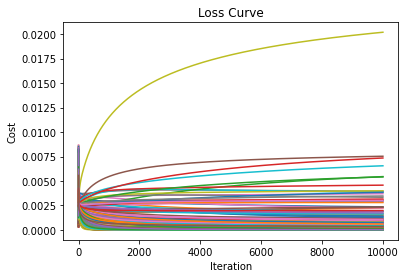

In [137]:
model.fit(train_X, train_y)

In [138]:
print(model.predict(test_X))

[1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1
 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1]


In [ ]:
model.w #show model weights
import pickle #import pickle library
with open('ylin254_cicloss _assignment1_part1.pickle', 'wb') as handle:
    pickle.dump(model.w, handle, protocol=pickle.HIGHEST_PROTOCOL) #save model weights to a pickle file

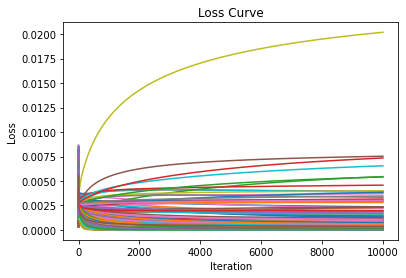

In [142]:
plt.plot(range(model.num_iterations),model.loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show() 